**En Az Önemli Bit (LSB) Steganografi**

En az önemli bit (LSB) steganograhisi, dijital ortamlarda, özellikle resimlerde gizli bilgileri gizlemek için kullanılan bir tekniktir. Basit ama etkili bir yöntemdir ve insan gözünün renk veya parlaklıktaki ince değişiklikleri algılamadaki sınırlı yeteneğini kullanır.

**LSB steganograhisi nasıl çalışır?**

Dijital görüntüler bit dizisi olarak temsil edilir: Bir görüntünün her pikseli, rengini ve parlaklığını tanımlayan bitlerin bir kombinasyonundan oluşur. Örneğin, 8 bitlik gri tonlamalı bir görüntü, 256 gri tonu temsil etmek için her piksel için 8 bit kullanır, 24 bit RGB görüntü ise milyonlarca rengi temsil etmek için her piksel için 24 bit kullanır.

*   En az önemli bit (LSB), bir ikili dizinin en sağdaki bitine karşılık gelir:Görüntü steganograhisi bağlamında, LSB, pikselin genel görünümünü en az etkileyen bittir. Bu biti değiştirmek, algıladığımız renk veya parlaklıkta ihmal edilebilir bir etkiye sahiptir.

*   Gizli bilgi ikili formata dönüştürülür:Gizlemek istediğiniz mesaj, metin, resim veya başka herhangi bir dijital veri olsun, önce 0'lar ve 1'lerden oluşan bir ikili diziye dönüştürülür.

*   Gizli mesaj bitleri, görüntü piksellerin LSB'lerine gömülür: Her pikselin LSB'leri, gizli mesajdan gelen karşılık gelen bitlerle değiştirilir. Bu işlem, tüm mesajı barındırmak için gereken kadar piksel için tekrarlanır.

*   Stego-görüntü oluşturulur: Gizli mesajı içeren değiştirilmiş görüntü, stego-görüntü olarak adlandırılır. Çıplak gözle orijinal görüntüye neredeyse aynı görünür.

**LSB steganograhisinin avantajları:**

*   Basitlik: Uygulaması ve anlaşılması nispeten basit bir tekniktir.
*   Yüksek kapasite: Görüntüler, LSB steganograhisi kullanılarak şaşırtıcı derecede büyük miktarda gizli veri tutabilir.
*   Algılamama: Doğru yapıldığında, gizli mesaj insan gözüne neredeyse algılanamaz.

**LSB steganograhisinin dezavantajları:**

*   Düşük güvenlik: LSB steganograhisi, gizli verinin varlığını algılayabilen steganaliz tekniklerine karşı hassastır.
*   Veri kaybı: LSB'leri bile değiştirmek, özellikle düşük çözünürlüklü görüntülerde hafif bozulmalar oluşturabilir.
*   İşleme için kırılgan: Gizli mesaj, sıkıştırma veya boyutlandırma gibi görüntü işleme işlemleriyle kolayca yok edilebilir.


**LSB steganograhisinin uygulamaları:**

*   Gizli iletişim: Mesajları görüntüler içinde gizlemek, doğrudan iletişimin mümkün olmadığı durumlarda güvenli iletişim için faydalı olabilir.
*   Dijital fligran: Telif hakkı bilgilerini veya sahiplik etiketlerini görüntülere gömmek, fikri mülkiyeti korumaya yardımcı olabilir.
*   Veri doğrulama: LSB steganograhisi, dijital içeriğin gerçekliğini doğrulamak için sağlama toplamları veya diğer verileri gömmek için kullanılabilir.

In [40]:
from PIL import Image

def encode_lsb(image_path, message, end_marker="@@@"):
    # Resmi yükle
    img = Image.open(image_path)
    pixels = list(img.getdata())

    # Mesajı binary formata çevir ve sona eriş işaretini ekle
    binary_message = ''.join(format(ord(char), '08b') for char in message) + ''.join(format(ord(char), '08b') for char in end_marker)

    # Least significant bit'leri kullanarak mesajı gizle
    index = 0
    for i in range(len(pixels)):
        pixel = list(pixels[i])
        for j in range(len(pixel)):  # Tüm renk bileşenleri (RGB veya RGBA)
            if index < len(binary_message):
                pixel[j] = pixel[j] & ~1 | int(binary_message[index])
                index += 1
        pixels[i] = tuple(pixel)

    # Yeni resmi oluştur
    encoded_img = Image.new(img.mode, img.size)
    encoded_img.putdata(pixels)

    # Yeni resmi kaydet
    encoded_img.save('encoded_image.png')

In [41]:
def decode_lsb(encoded_image_path, end_marker="@@@"):
    # Kodlanmış resmi yükle
    encoded_img = Image.open(encoded_image_path)
    pixels = list(encoded_img.getdata())

    # Least significant bit'leri kullanarak mesajı çıkar
    binary_message = ''
    for pixel in pixels:
        for value in pixel:
            binary_message += str(value & 1)

    # Binary mesajı ASCII'ye çevir
    decoded_message = ''.join(chr(int(binary_message[i:i+8], 2)) for i in range(0, len(binary_message), 8))

    # Mesajın sonunu bul ve döndür
    end_index = decoded_message.find(end_marker)
    if end_index != -1:
        return decoded_message[:end_index]
    else:
        return decoded_message

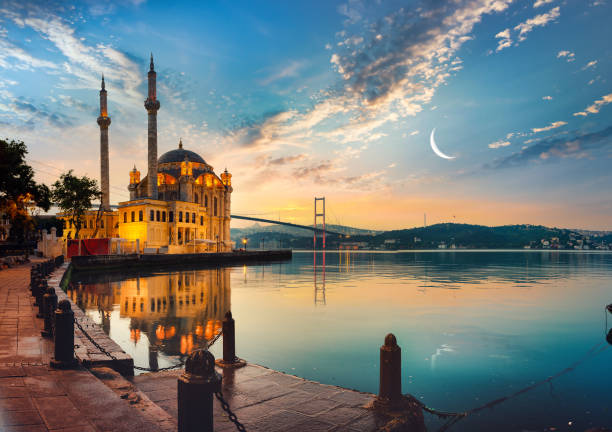

In [42]:
from IPython.display import Image as ColabImage
ColabImage('original_image.png')

In [43]:
image_path      = 'original_image.png'
message_to_hide = 'Gizli mesaj!'
encode_lsb(image_path, message_to_hide)

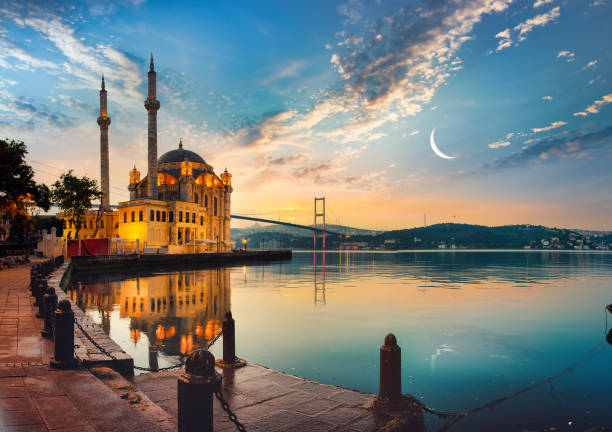

In [44]:
from IPython.display import Image as ColabImage
ColabImage('encoded_image.png')

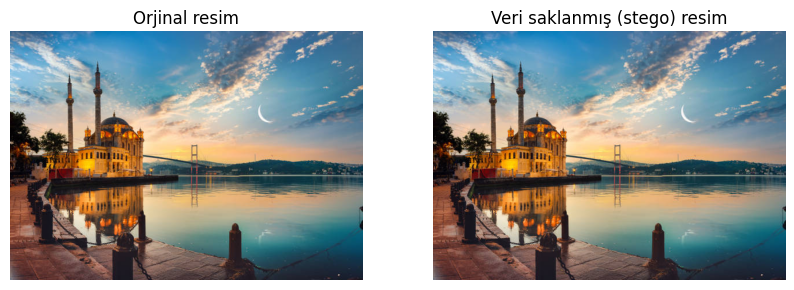

In [45]:
import matplotlib.pyplot as plt
from PIL import Image

# Resimleri yükleyin
image1 = Image.open('/content/original_image.png')
image2 = Image.open('/content/encoded_image.png')

# Figür ve eksenleri oluşturun
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# İlk resmi göster
axes[0].imshow(image1)
axes[0].axis('off')  # Eksenleri gizle
axes[0].set_title('Orjinal resim')

# İkinci resmi göster
axes[1].imshow(image2)
axes[1].axis('off')  # Eksenleri gizle
axes[1].set_title('Veri saklanmış (stego) resim')

# Gösterimi yap
plt.show()


In [46]:
! md5sum *.png

0e50118d7d7a202e89a227fe30289fe2  encoded_image.png
0678ae3b8f55de9b9a29c1dc4e958423  original_image.png


In [47]:
! diff original_image.png encoded_image.png

Binary files original_image.png and encoded_image.png differ


In [48]:
! ls -al *.png

-rw-r--r-- 1 root root 358281 Jan 14 23:54 encoded_image.png
-rw-r--r-- 1 root root 351923 Jan 14 23:28 original_image.png


In [49]:
decoded_message = decode_lsb('encoded_image.png')
print('Decoded Message:', decoded_message)

Decoded Message: Gizli mesaj!


**"Distanced Least Significant Bit" (DLSB) steganografi**

Geleneksel LSB steganografi yöntemini geliştiren bir tekniktir. Bu teknik, gizli mesajı saklamak için belirli aralıklarla pikselleri kullanır. `distance` parametresi, pikseller arasındaki mesafe olarak kullanılır ve mesajı gizlerken bu aralıkları atlar.


**DLSB nasıl çalışır?**

1.   **Resmi üst üste binmeyen bloklara bölün:** Resim, genellikle 2x2 veya 4x4 piksel boyutunda daha küçük bloklara bölünür.

2.   **Mesafe fonksiyonu uygulanır:** Her bloktaki pikseller arasındaki uzamsal ilişkiyi belirlemek için bir mesafe fonksiyonu kullanılır. Yaygın mesafe fonksiyonları arasında Öklid mesafesi, Manhattan mesafesi veya Çebiçev mesafesi bulunur.

3.   **Gömmek için pikseller belirlenir:** Mesafe fonksiyonuna göre, her bloktaki belirli pikseller gizli veriyi gömmek için seçilir. Bu pikseller genellikle görsel olarak daha az önemli veya çevredeki piksellerle daha iyi karışma olasılığı olan piksellerdir.

4.   **Veri, seçilen piksellerin LSB'lerine gömülür:** Seçilen piksellerin en az önemli bitleri (LSB'leri), gizli mesajdan gelen bitlerle değiştirilir. LSB'ler, piksel değerinin ikili temsilindeki en sağdaki bitlerdir ve görsel görünümü en az etkiler.

5.   **Gömmeyi bloklar arasında yayın:** DLSB, mesajın art arda gelen bitlerini art arda gelen piksellere gömme yerine, gömeyi farklı bloklar arasında yayar. Bu, gizli veriyi algılama tekniklerinin tespit etmesini zorlaştırır.

**DLSB'nin avantajları:**

*   Artan güvenlik: DLSB, geleneksel LSB steganograhisinde olduğundan daha güvenlidir çünkü görsel saldırılara ve istatistiksel analize karşı daha az duyarlıdır.

*   Azaltılmış bozulma: Gömmenin mekansal dağılımı, görsel kusurları en aza indirir ve görüntü kalitesini korur.

*   Algılama direnci: Gömmenin dağınık doğası, gizli veri varlığını tespit etmeyi steganaliz araçları için zorlaştırır.

**DLSB'nin uygulamaları:**

*   **Gizli iletişim:** DLSB, gizli mesajları görüntüler aracılığıyla şüphe uyandırmadan iletmek için kullanılabilir.
*   **Dijital sulama:** Telif hakkı bilgilerini veya sahiplik etiketlerini görüntülere gömmek için kullanılabilir ve fikri mülkiyeti korumak için kullanılabilir.
*   **Veri gizleme:** Gizli verileri, güvenli depolama veya iletim için görüntülere gizlemek için kullanılabilir.

**Dikkate alınması gerekenler:**

*   **Gömme kapasitesi:** DLSB kullanılarak gizlenebilecek veri miktarı, görüntünün boyutuna ve fark edilmeden değiştirilebilecek bit sayısına göre sınırlıdır.
*   **Görüntü kalitesi:** DLSB, görsel bozulmayı en aza indirmeyi amaçlasa da, özellikle daha yüksek gömme oranlarında bazı görüntü bozulmaları yine de meydana gelebilir.
*   **Algılama teknikleri:** Herhangi bir steganograhi tekniğinde olduğu gibi, gelişmiş steganaliz yöntemleri tarafından algılanma riski her zaman vardır.

In [50]:
from PIL import Image
import random

def encode_dlsb(image_path, message, distance=100, end_marker="@@@"):
    # Resmi yükle
    img = Image.open(image_path)
    pixels = list(img.getdata())

    # Mesajı binary formata çevir ve sona eriş işaretini ekle
    binary_message = ''.join(format(ord(char), '08b') for char in message) + ''.join(format(ord(char), '08b') for char in end_marker)

    # Mesaj bitlerini düzenli aralıklarla yerleştir
    index = 0
    for i in range(0, len(pixels), distance):
        if index < len(binary_message):
            pixel = list(pixels[i])
            pixel[0] = pixel[0] & ~1 | int(binary_message[index])  # Sadece ilk renk bileşenini kullan
            pixels[i] = tuple(pixel)
            index += 1

    # Yeni resmi oluştur
    encoded_img = Image.new(img.mode, img.size)
    encoded_img.putdata(pixels)

    # Yeni resmi kaydet
    encoded_img.save('encoded_image.png')

In [51]:
def decode_dlsb(encoded_image_path, distance=100, end_marker="@@@"):
    # Kodlanmış resmi yükle
    encoded_img = Image.open(encoded_image_path)
    pixels = list(encoded_img.getdata())

    # Mesajı çıkar
    binary_message = ''
    for i in range(0, len(pixels), distance):
        binary_message += str(pixels[i][0] & 1)

    # Binary mesajı ASCII'ye çevir
    decoded_message = ''.join(chr(int(binary_message[i:i+8], 2)) for i in range(0, len(binary_message), 8))

    # Mesajın sonunu bul ve döndür
    end_index = decoded_message.find(end_marker)
    if end_index != -1:
        return decoded_message[:end_index]
    else:
        return decoded_message

In [52]:
image_path      = 'original_image.png'
message_to_hide = 'Çok gizli mesaj!'
encode_dlsb(image_path, message_to_hide, distance=3)

In [53]:
decoded_message = decode_dlsb('encoded_image.png', distance=3)
print('Decoded Message:', decoded_message)

Decoded Message: Çok gizli mesaj!
